In [5]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

In [6]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [7]:
def create_image(data, cmap='gray', dpi=80, vmin=None, vmax=None, origin=None, norm=None):
    '''
    Create an image with exactly the same pixel dimension as the data.
    Example:
        x, y = np.arange(0, 10), np.arange(0, 10)
        xx, yy = np.meshgrid(x, y)
        img = np.array((xx + yy)%2==0, dtype=int)
        ax = create_image(img)
        plt.savefig('img.png')
        plt.close()
    '''
    xpixels, ypixels = data.shape[0], data.shape[1]
    figsize = ypixels / dpi, xpixels / dpi
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(data, cmap=cmap, interpolation='none', vmin=vmin, vmax=vmax, origin=origin, norm=norm)
    plt.axis('off')
    return ax

--------
# Case 1
img==0

127765


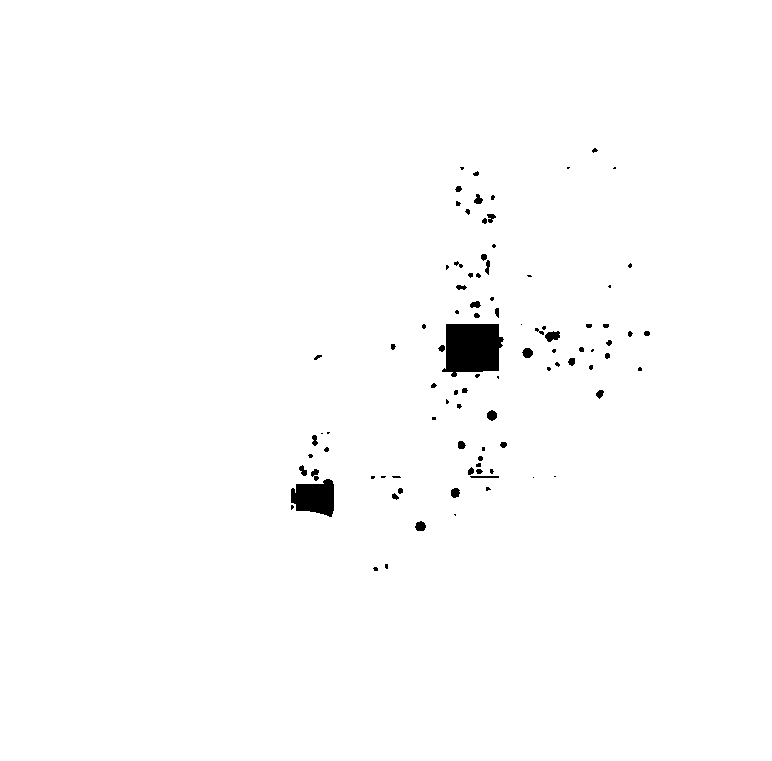

In [106]:
brickname = '1286p200'
band = 'r'

img = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-image-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
ivar = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-invvar-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
nexp = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-nexp-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
maskbits = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-maskbits.fits.fz'.format(brickname[:3], brickname, brickname))
img = (img==0) & (nexp>0) & (ivar>0)
# img = (np.abs(img)<1e-5) & (nexp>0)
bits_to_mask = [0, 2, 3, 4, 5, 6, 7]
for bit in bits_to_mask:
    img &= (maskbits & 2**bit)==0
print(np.sum(img))

# downsize image
binsize = 5
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.max(np.max(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

create_image(img, cmap='gray_r', origin='lower')
# plt.savefig('test.png')

39418


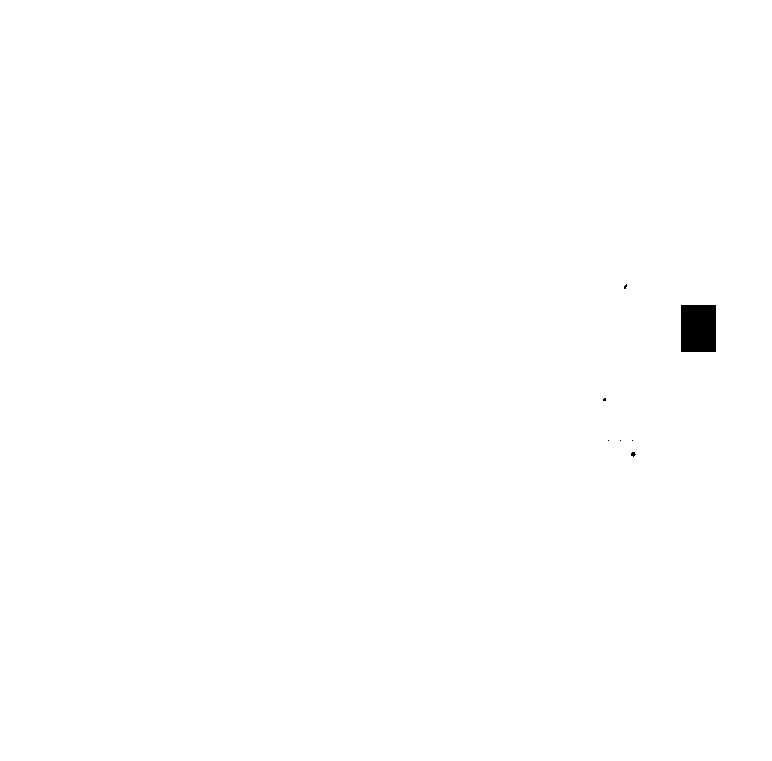

In [9]:
brickname = '1884p152'
band = 'z'

img = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-image-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
ivar = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-invvar-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
nexp = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-nexp-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
maskbits = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-maskbits.fits.fz'.format(brickname[:3], brickname, brickname))
img = (img==0) & (nexp>0) & (ivar>0)
# img = (np.abs(img)<1e-5) & (nexp>0)
bits_to_mask = [0, 2, 3, 4, 5, 6, 7]
for bit in bits_to_mask:
    img &= (maskbits & 2**bit)==0
print(np.sum(img))

# downsize image
binsize = 5
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.max(np.max(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

create_image(img, cmap='gray_r', origin='lower')
# plt.savefig('test.png')

43616


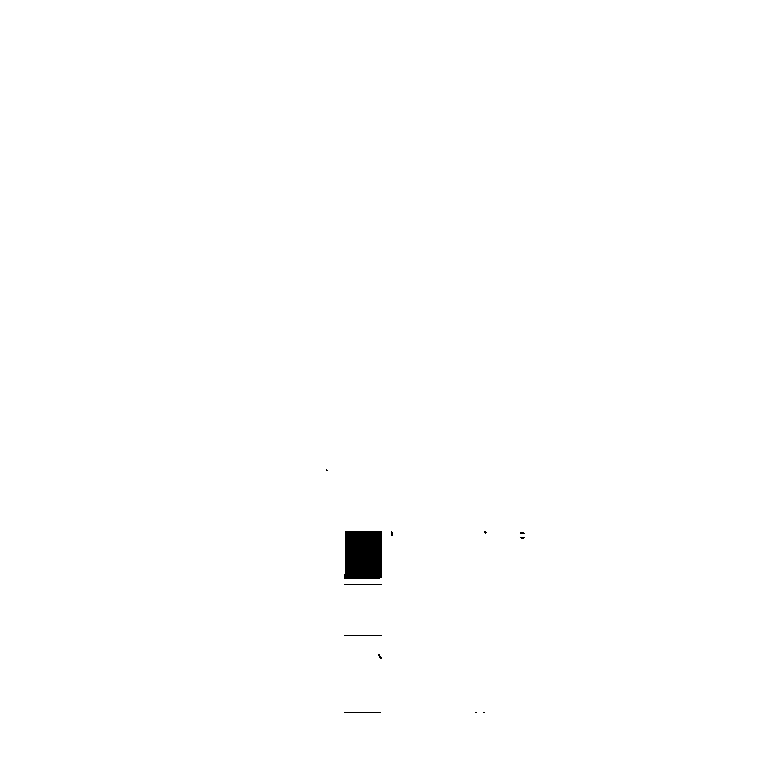

In [20]:
brickname = '1922p142'
band = 'r'

img = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-image-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
ivar = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-invvar-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
nexp = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-nexp-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
maskbits = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-maskbits.fits.fz'.format(brickname[:3], brickname, brickname))
img = (img==0) & (nexp>0) & (ivar>0)
# img = (np.abs(img)<1e-5) & (nexp>0)
bits_to_mask = [0, 2, 3, 4, 5, 6, 7]
for bit in bits_to_mask:
    img &= (maskbits & 2**bit)==0
print(np.sum(img))

# downsize image
binsize = 5
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.max(np.max(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

create_image(img, cmap='gray_r', origin='lower')
# plt.savefig('test.png')

--------
# Case 2
img!=0 but close to zero

0


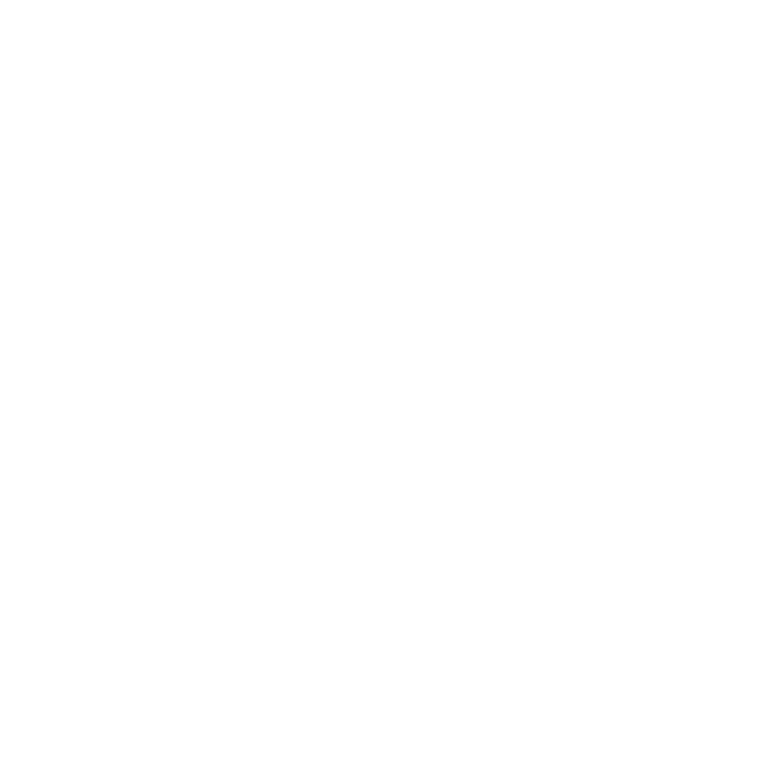

In [50]:
brickname = '3196p182'
band = 'r'
img = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-image-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
ivar = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-invvar-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
nexp = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-nexp-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
img = (img==0) & (nexp>0) & (ivar>0)
# img = (np.abs(img)<1e-5) & (nexp>0)
print(np.sum(img))

# downsize image
binsize = 5
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.max(np.max(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

create_image(img, cmap='gray_r', origin='lower')
# plt.savefig('test.png')

1591495
161846.0
161846


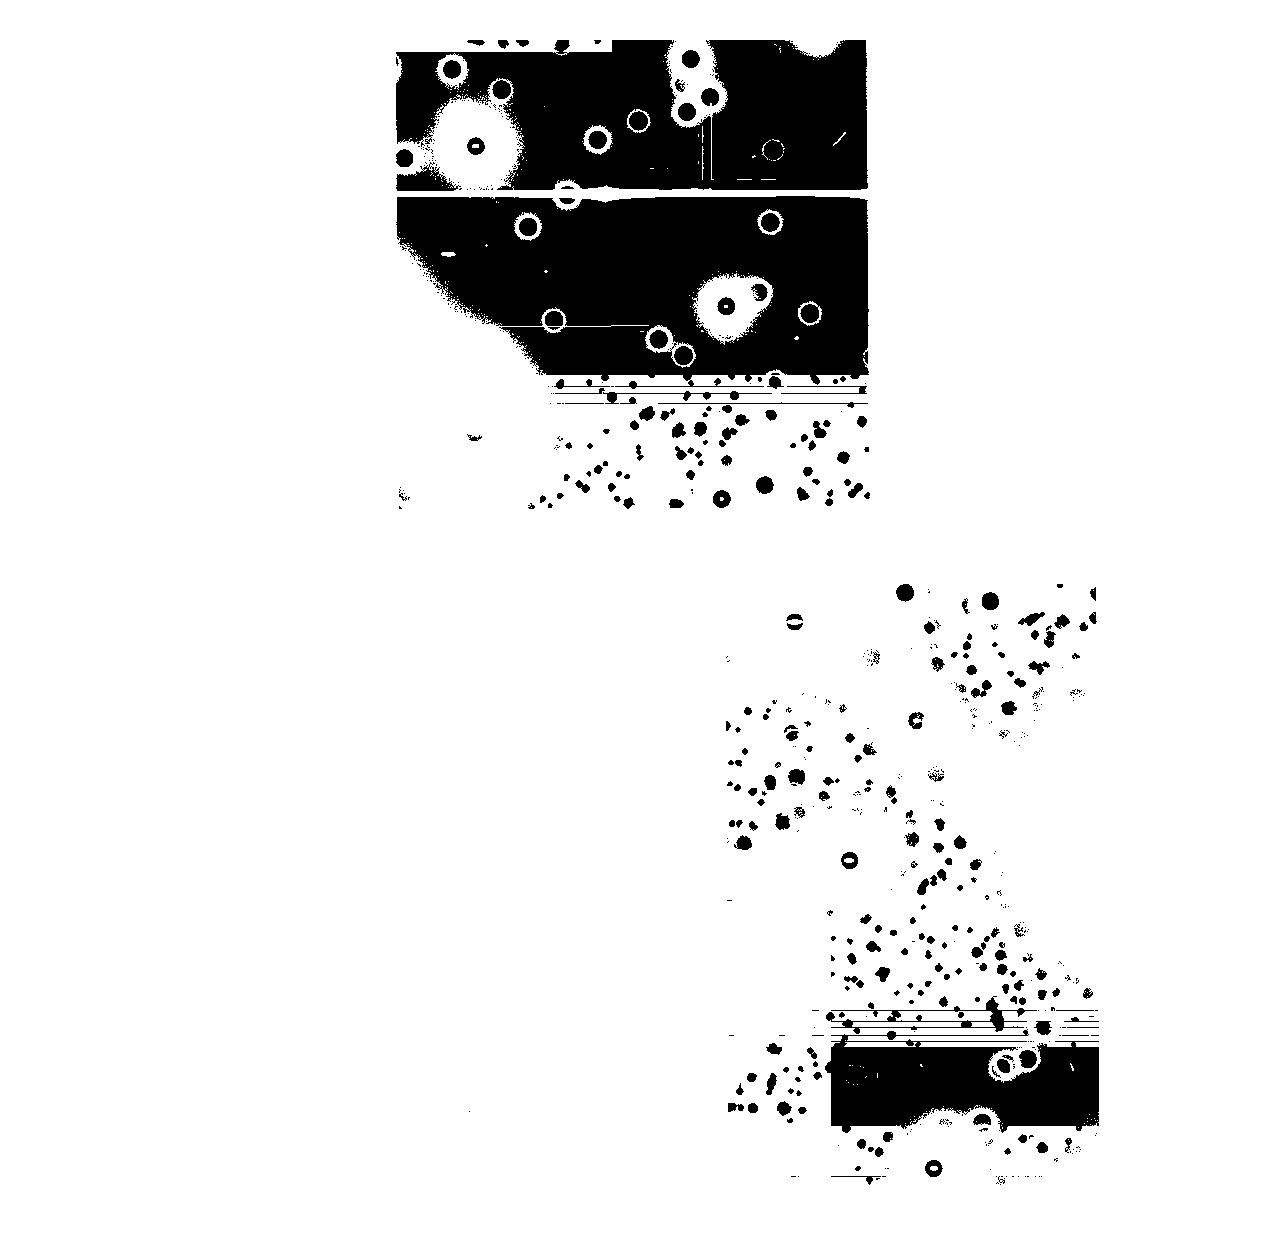

In [115]:
brickname = '3196p182'
band = 'r'
img = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-image-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
ivar = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-invvar-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
nexp = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-nexp-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
# img = (img==0) & (nexp>0)
# img = (np.abs(img)<1e-5) & (nexp>0)
img = (np.abs(img)<1e-4) & (nexp>0) & (ivar>0)
bits_to_mask = [0, 2, 3, 4, 5, 6, 7]
for bit in bits_to_mask:
    img &= (maskbits & 2**bit)==0
print(np.sum(img))

# downsize image
binsize = 3
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.median(np.median(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)
print(np.sum(img))
img = img>0
print(np.sum(img))

create_image(img, cmap='gray_r', origin='lower')
# plt.savefig('test.png')

In [116]:
img

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

--------
# Case 3


18640
215418


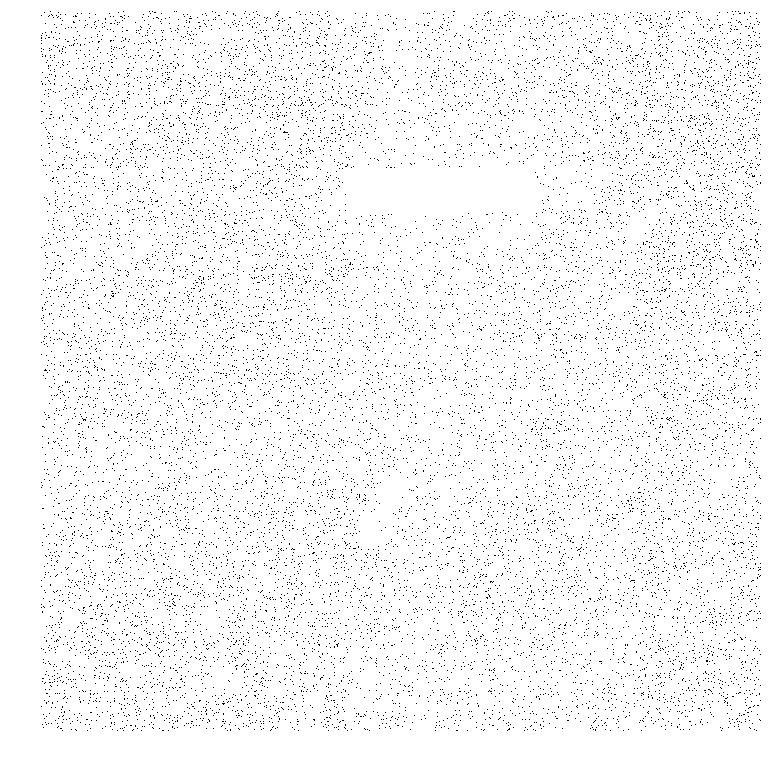

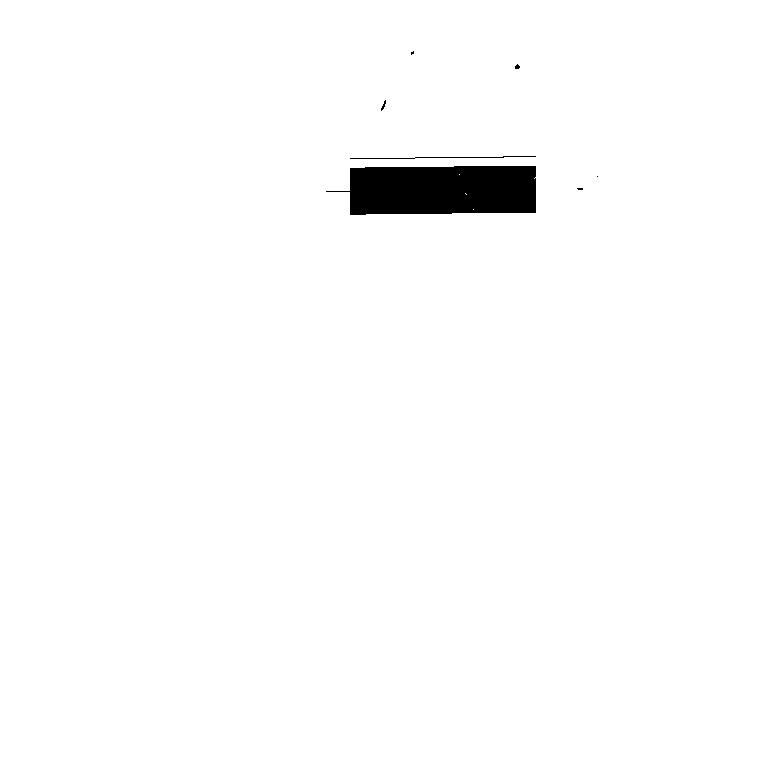

In [101]:
brickname = '3580p330'
band = 'r'

img = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-image-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
ivar = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-invvar-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
nexp = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-nexp-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
# img = (img==0) & (nexp>0)
# img = (np.abs(img)<1e-5) & (nexp>0)
img = (np.abs(img)<1e-5) & (nexp>0) & (ivar>0)
print(np.sum(img))

# downsize image
binsize = 5
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.max(np.max(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

create_image(img, cmap='gray_r', origin='lower')
# plt.savefig('test.png')

########################################################

img = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-image-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
ivar = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-invvar-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
nexp = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-nexp-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
maskbits = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-maskbits.fits.fz'.format(brickname[:3], brickname, brickname))
# img = (img==0) & (nexp>0)
# img = (np.abs(img)<1e-5) & (nexp>0)
img = (nexp==0) & (ivar==0) & (img!=0)
bits_to_mask = [0, 2, 3, 4, 5, 6, 7]
for bit in bits_to_mask:
    img &= (maskbits & 2**bit)==0

print(np.sum(img))

# downsize image
binsize = 5
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.max(np.max(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

create_image(img, cmap='gray_r', origin='lower')
# plt.savefig('test.png')

__Normal brick near the survey boundary__  
https://www.legacysurvey.org/viewer-dev/?ra=112.9947&dec=17.0102&layer=ls-dr9&zoom=12&bricks

2


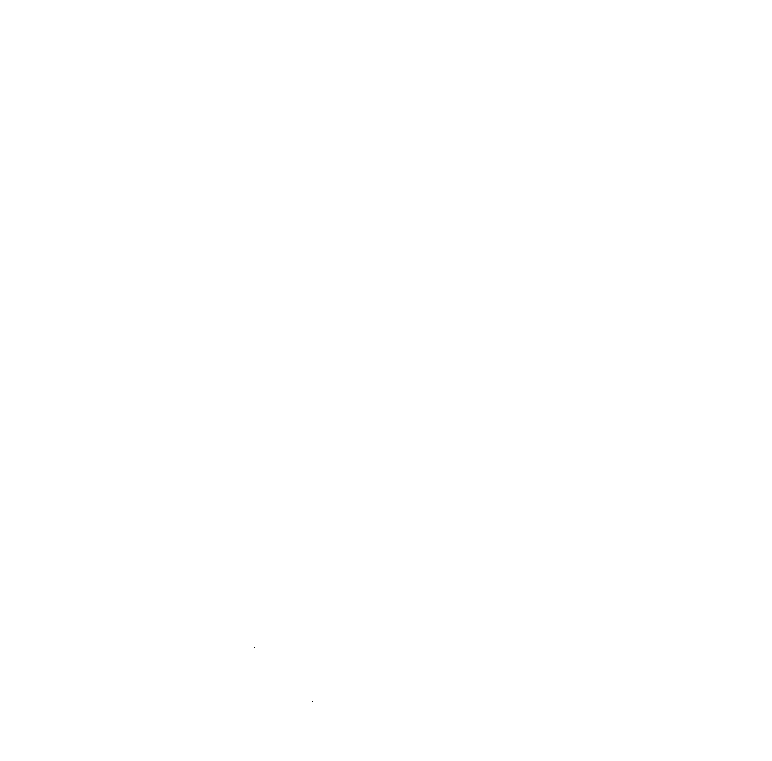

In [102]:
brickname = '1129p170'
band = 'r'

img = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-image-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
ivar = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-invvar-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
nexp = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-nexp-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
maskbits = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-maskbits.fits.fz'.format(brickname[:3], brickname, brickname))
# img = (img==0) & (nexp>0)
# img = (np.abs(img)<1e-5) & (nexp>0)
img = (nexp==0) & (ivar==0) & (img!=0)
bits_to_mask = [0, 2, 3, 4, 5, 6, 7]
for bit in bits_to_mask:
    img &= (maskbits & 2**bit)==0

print(np.sum(img))

# downsize image
binsize = 5
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.max(np.max(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

create_image(img, cmap='gray_r', origin='lower')
# plt.savefig('test.png')

__Normal brick__  
https://www.legacysurvey.org/viewer-dev/?ra=191.7890&dec=15.5251&layer=ls-dr9&zoom=12&bricks

0
163165
3.0
3
0


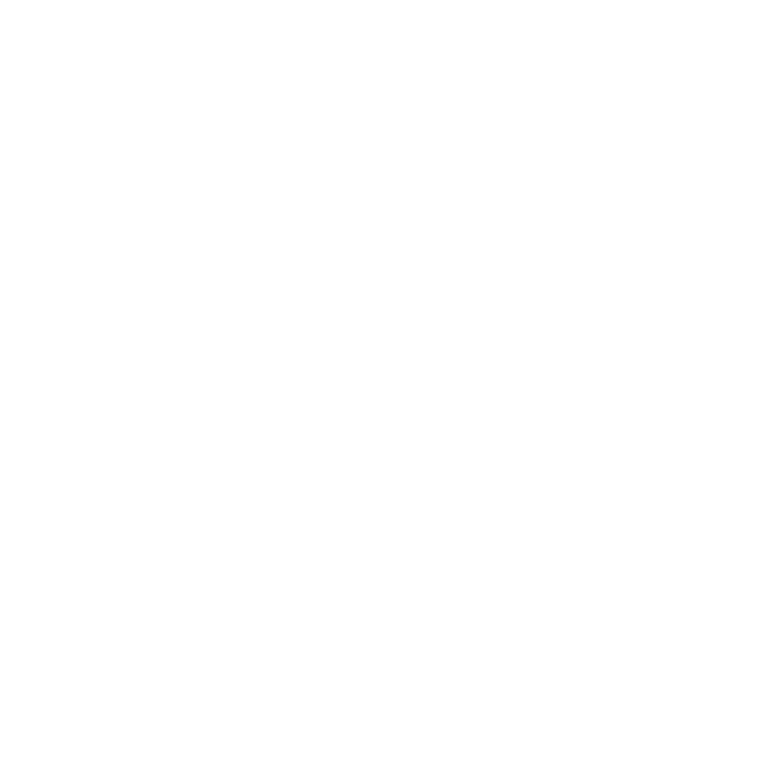

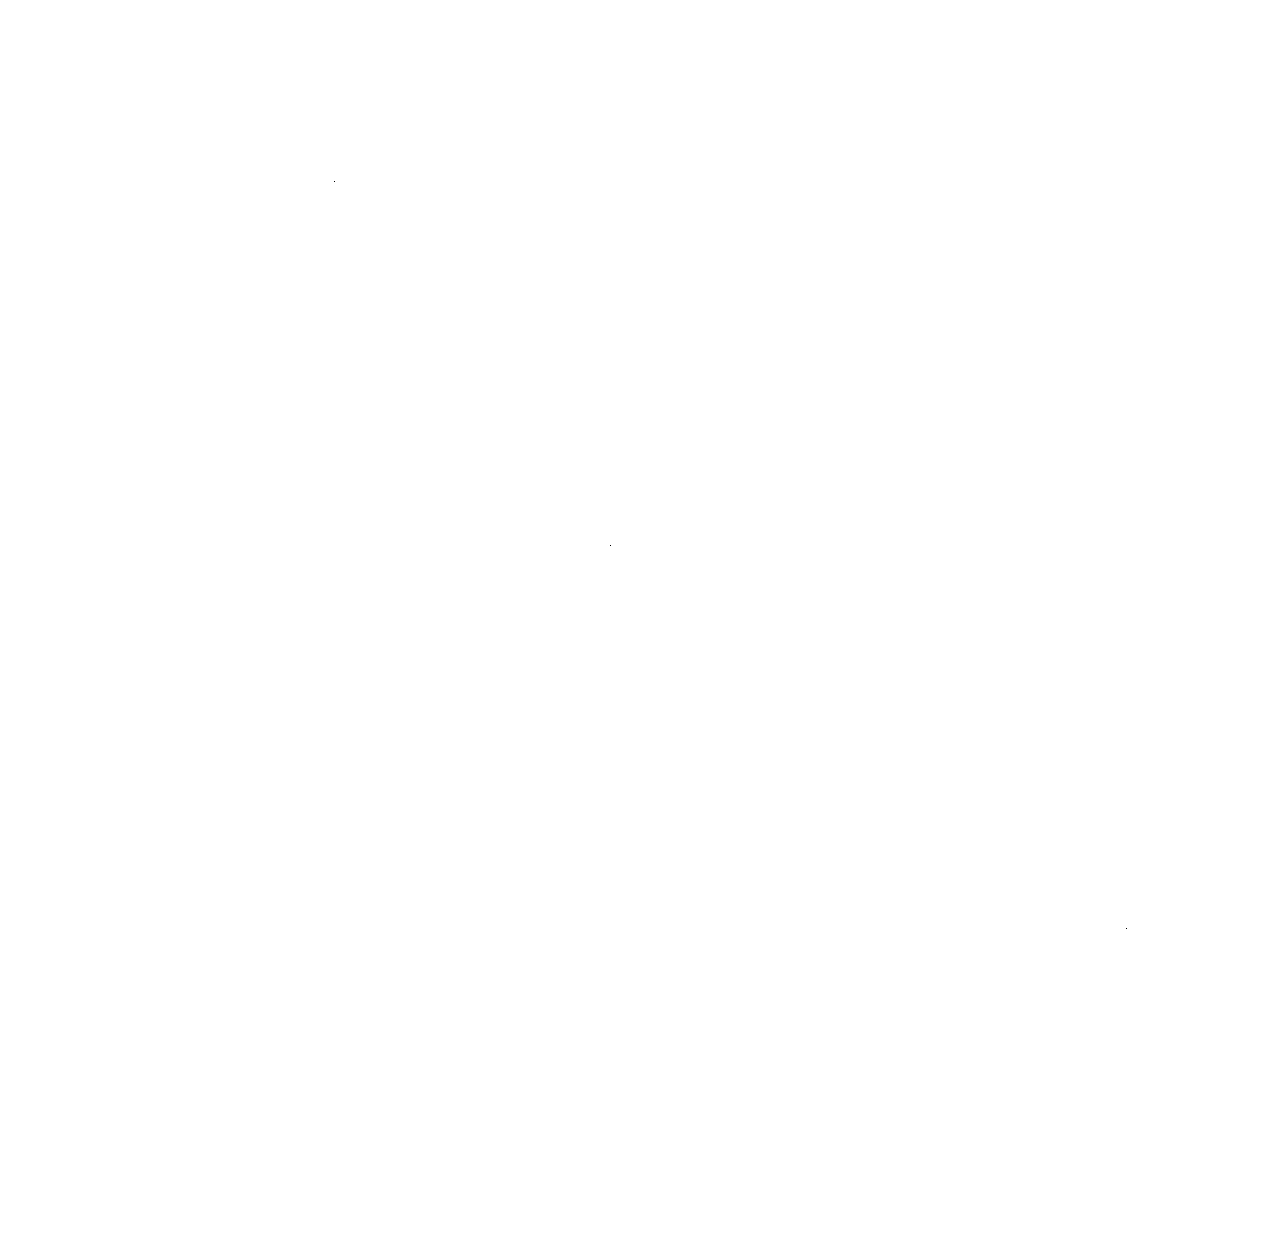

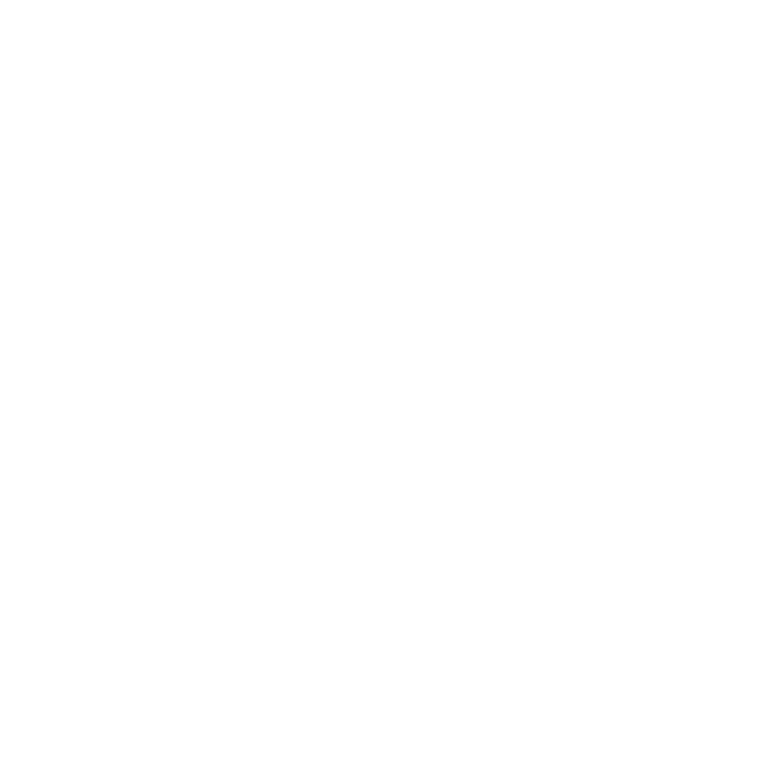

In [117]:
brickname = '1917p155'
band = 'r'

img = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-image-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
ivar = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-invvar-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
nexp = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-nexp-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
img = (img==0) & (nexp>0) & (ivar>0)
# img = (np.abs(img)<1e-5) & (nexp>0)
print(np.sum(img))

# downsize image
binsize = 5
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.max(np.max(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

create_image(img, cmap='gray_r', origin='lower')
# plt.savefig('test.png')

########################################################

img = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-image-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
ivar = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-invvar-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
nexp = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-nexp-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
# img = (img==0) & (nexp>0)
# img = (np.abs(img)<1e-5) & (nexp>0)
img = (np.abs(img)<1e-4) & (nexp>0) & (ivar>0)
print(np.sum(img))

# downsize image
binsize = 3
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.median(np.median(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)
print(np.sum(img))
img = img>0
print(np.sum(img))

create_image(img, cmap='gray_r', origin='lower')
# plt.savefig('test.png')

########################################################

img = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-image-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
ivar = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-invvar-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
nexp = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-nexp-{}.fits.fz'.format(brickname[:3], brickname, brickname, band))
maskbits = fitsio.read('/global/cfs/cdirs/cosmo/work/legacysurvey/dr9m/south/coadd/{}/{}/legacysurvey-{}-maskbits.fits.fz'.format(brickname[:3], brickname, brickname))
# img = (img==0) & (nexp>0)
# img = (np.abs(img)<1e-5) & (nexp>0)
img = (nexp==0) & (ivar==0) & (img!=0)
bits_to_mask = [0, 2, 3, 4, 5, 6, 7]
for bit in bits_to_mask:
    img &= (maskbits & 2**bit)==0

print(np.sum(img))

# downsize image
binsize = 5
trim_size_x = img.shape[1] % binsize
trim_size_y = img.shape[0] % binsize
img = img[:(img.shape[0]-trim_size_y), :(img.shape[1]-trim_size_x)]
# to ignore NAN values, use np.nanmean
img = np.max(np.max(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)

create_image(img, cmap='gray_r', origin='lower')
# plt.savefig('test.png')